# Decision Tree
- 분류와 회귀문제 모두 사용가능
- 트리의 루트에서 시작해 정보 이득(IG, Integration Gain)이 최대가 되는 특성으로 데이터 분할 후 분기 선택 (=> 정보량 개념 사용)
    - 정보량
        - 당연한 사실일수록 정보의 가치는 낮다
        - **불확실성**이 높을수록 정보량이 많아짐
        - 따라서, 정보량은 **발생 확률에 반비례**
        - 정보량
    \begin{align}
    I(E) = log_2(\frac{1}{P(E)}) = -log_2(P(E))
    \end{align}

- **``불순도(impurity), 불확실성이 더 크게 감소하는 쪽으로 분기 선택``**
- 지표들: Entropy, Gini index, classification error 사용
    - ``Entropy`` (평균 정보량)
        - $ I_H = -ΣP\log_2P$
        - 2개의 사건이 0.5, 0.5의 발생확률이면 엔트로피는 최대인 1 => 불확실성이 가장 높음
    - ``Gini index`` (지니계수)
        - $I_G = ΣP(1-P) = 1 - ΣP^2$
        - 사건들의 확률이 같을때 최대 => 0.5
- 각 feature가 개별 처리되기 때문에 데이터 스케일에 영향을 받지 않아 **특성의 정규화나 표준화가 필요 없음**

## 직접구현

In [1]:
### Decision Tree 구현
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# iris 데이터 읽어오기
iris = load_iris()

# 데이터 분류
x_train = iris['data'][:,0]
y_train = iris['target']
# plt.scatter(x_train, y_train);

# DataFrame 만들기
df = pd.DataFrame(data=np.c_[x_train, y_train], columns=['data', 'target'])
df = df.astype({'target':'int'})
df.head()
df

# div라는 분기후보들의 리스트 생성
x_range = list(set(x_train))
x_range.sort()
div = [(x_range[i]+x_range[i+1]) / 2 for i in range(len(x_range)-1)]


# div에 있는 분기후보들 각각의 Gini index를 찾아줌
gini = []
for i in div:
  left = df[df['data'] < i]['target'].to_numpy().astype('int')
  right = df[df['data'] > i]['target'].to_numpy().astype('int')
  G_L = 1
  G_R = 1
  for j in np.bincount(left):
    G_L -= (j/len(left))**2
  for k in np.bincount(right):
    G_R -= (k/len(right))**2

  weighted_G = G_L*(len(left)/(len(left)+len(right))) + G_R*(len(right)/(len(left)+len(right)))
  gini.append(weighted_G)

# Root의 Gini index 계산
root_G = 1 - (len(df[df['target']==0.0])/len(y_train))**2 - (len(df[df['target']==1.0])/len(y_train))**2 - (len(df[df['target']==2.0])/len(y_train))**2

# Information gain 계산
IG = []
for i in gini:
  IG.append(root_G - i)

# IG중 가장 큰값 찾은 후 해당분기 프린트 (***gini index가 가장 작은 값을 찾아도 됨***)
print('Information gain의 최댓값의 인덱스:', IG.index(max(IG)))
print('최적의 분기가 되는 point:', div[11])

Information gain의 최댓값의 인덱스: 11
최적의 분기가 되는 point: 5.45


## sklearn 이용해 구현

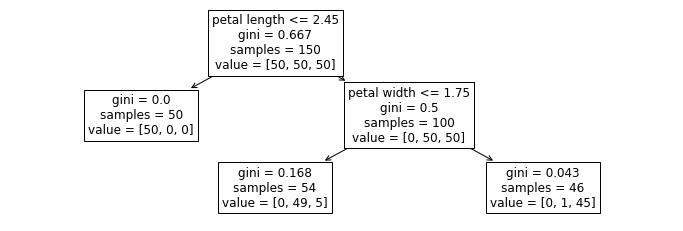

In [2]:
# sklearn 이용해 간단하게 작성
import numpy as np
import pandas as pd
import matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris


# iris 데이터 읽어오기
iris = load_iris()

# DataFrame 만들기
# 처음엔 sepal length만 갖고 모델링
# df = pd.DataFrame(data=np.c_[iris['data'][:,0], iris['target']], columns=['data', 'target'])
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

# data 생성
x_train = np.array(df.iloc[:, :-1]).reshape(-1,4)    # 훈련데이터를 (150, 1)로 reshape
y_train = df['target']

# Decision Tree 객체생성
# 첫번째 최적의 분기만 확인하려면 max_depth = 1로 설정
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

# 결과 확인
plt.figure(figsize=(12, 4))
tree.plot_tree(dt, feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'], fontsize=12)   # dt plot을 그려줌
plt.show()

# 결과를 보면
# 1. 분기를 나눈 feature 이름
# 2. gini 계수 
# 3. sample의 개수
# 4. value : target에 해당하는 sample 개수들

## for문을 이용해 optimal depth 찾기

[0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6666666666666666, 0.95, 0.9666666666666667, 0.9916666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


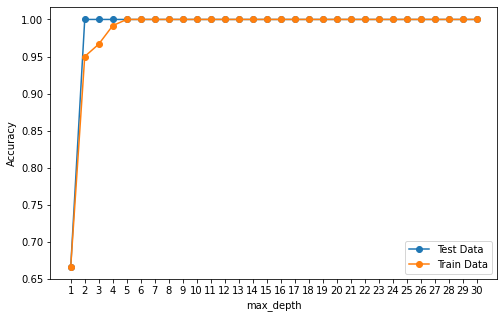

optimal depth = 2, accuracy = 1.000


In [3]:
# 최적의 depth 찾기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# data 읽어오기
iris = load_iris()

# dataset 생성
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)

# max_depth = 30으로 설정하고 최적의 depth찾기
max_depth = 30
acc_test = []
acc_train = []
for i in range(1, max_depth+1):       # 분기가 1이상이여야 하기 때문에 1부터 시작
  # DT로 데이터 학습
  dt = DecisionTreeClassifier(max_depth=i)   
  dt.fit(x_train, y_train)

  y_pred = dt.predict(x_test)
  acc_test.append((y_test == y_pred).mean())

  y_pred = dt.predict(x_train)
  acc_train.append((y_train == y_pred).mean())

  # 아래처럼해도 된다.
  # acc_test.append(dt.score(x_test, y_test))
  # acc_train.append(dt.score(x_train, y_train))

print(acc_test)
print(acc_train)

# plt으로 시각화
plt.figure(figsize=(8, 5))
plt.plot(acc_test, marker='o', label="Test Data")
plt.plot(acc_train, marker='o', label="Train Data")
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(max_depth), np.arange(1, max_depth + 1))
plt.show()

opt_depth = np.argmax(acc_test)
opt_acc = acc_test[opt_depth]

print("optimal depth = {}, accuracy = {:.3f}".format(opt_depth + 1, opt_acc))

## 당뇨병 환자 예측
 - 성별, 체질량지수 등 총 8개의 feature
 - target값 0이면 정상 1이면 당뇨병환자


In [4]:
# 당뇨병 환자 데이터를 읽어와 KNN, DT를 이용해서 예측해보고 결과 비교하기
# 캐글 Diabetes Dataset 링크
# https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

import pandas as pd

df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data = df.to_numpy()[:, :-1]
target = df['Outcome'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [6]:
# max_depth 1~20까지 중에 정확도가 가장 큰 depth 찾기
max_dep = 20
acc_test = []
acc_train = []

for i in range(1, max_dep+1):
  # DT 객체 생성 후 훈련
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(x_train, y_train)

  acc_test.append(dt.score(x_test, y_test))
  acc_train.append(dt.score(x_train, y_train))

opt_depth = np.argmax(acc_test)
opt_acc = acc_test[opt_depth]

print("optimal depth = {}, accuracy = {:.3f}".format(opt_depth + 1, opt_acc))

# opt_depth로 최종모델 생성
model = DecisionTreeClassifier(max_depth=opt_depth)

# new data 테스트
new_data = [3., 127., 85., 25., 473., 27., 0.5, 37.]
d = np.array(new_data).reshape(1, -1)

y_hat = dt.predict(d)
print(f'x = [3., 127., 85., 25., 473., 27., 0.5, 37.] --> prediction y:{y_hat[0]}')     # {y_hat[0]}

optimal depth = 9, accuracy = 0.792
x = [3., 127., 85., 25., 473., 27., 0.5, 37.] --> prediction y:1


## Decision Tree Regressor model
 - Boston 집값 예측


In [7]:
# DT regressor model 만들어보고 optimal depth 찾기
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# data 로드 후 확인
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# data 분리
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [10]:
# optimal_depth 찾기
max_depth = 20
R2 = []
for i in range(1, max_depth+1):
  reg = DecisionTreeRegressor(max_depth=i)
  reg.fit(x_train, y_train)

  R2.append(reg.score(x_test, y_test))

opt_depth = np.argmax(R2)
opt_R2 = min(R2)
print(f'opt_depth: {opt_depth} \nopt_R2: {opt_R2}')


# opt_depth로 최종 모델 만들고 성능 확인
opt_reg = DecisionTreeRegressor(max_depth=opt_depth)  # 또는 model = DecisionTreeRegressor(max_depth=opt_depth)
opt_reg.fit(x_train, y_train)

R2 = opt_reg.score(x_test, y_test)
print(R2)


# 최종 모델의 성능 확인
# R2 : score 함수를 통한 R2값 계산 (회귀문제에서 score함수는 R2값 리턴)
print("R2 = {:.4f}".format(opt_reg.score(x_test, y_test)))

# R2 : sklearn metrics에서 r2_score 함수로 계산
y_pred = opt_reg.predict(x_test)
print("R2 = {:.4f}".format(r2_score(y_test, y_pred)))

# MSE
print("MSE = {:.4f}".format(mean_squared_error(y_test, y_pred)))

opt_depth: 3 
opt_R2: 0.3039272484553709
0.7172788016579106
 R2 = 0.7173
 R2 = 0.7173
MSE = 21.8967


[0.03789128 0.         0.         0.         0.0320278  0.66241178
 0.         0.06370293 0.         0.         0.         0.
 0.20396621]


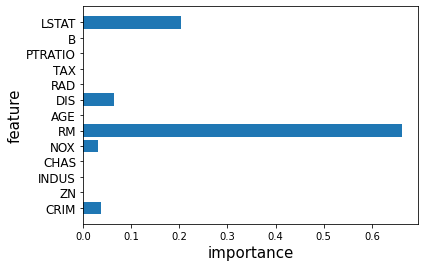

In [11]:
# DT의 장점 중 하나, 간단하게 feature별 중요도 분석 가능
feature_importance = opt_reg.feature_importances_
print(feature_importance)

n_feature = x_train.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center')
plt.yticks(idx, boston['feature_names'], size=12)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.show()